In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract

In [2]:
from src.image_handler import *
from src.processing import *

## processing

#### Raw image

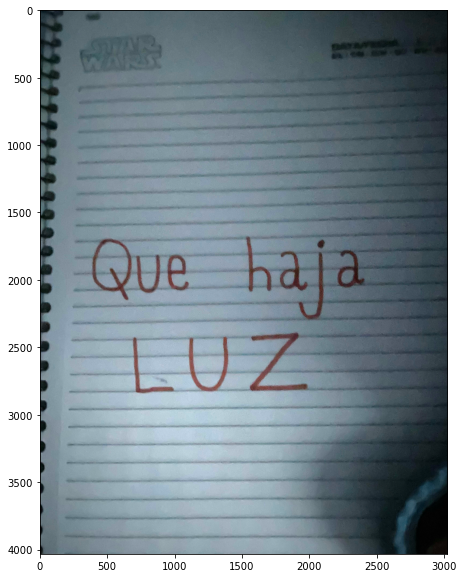

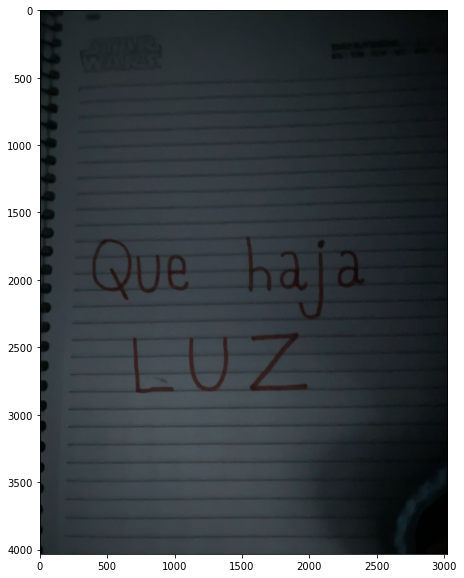

In [3]:
raw = read_image(file='dark')
show(normalize(raw))
show(raw)

### Processing

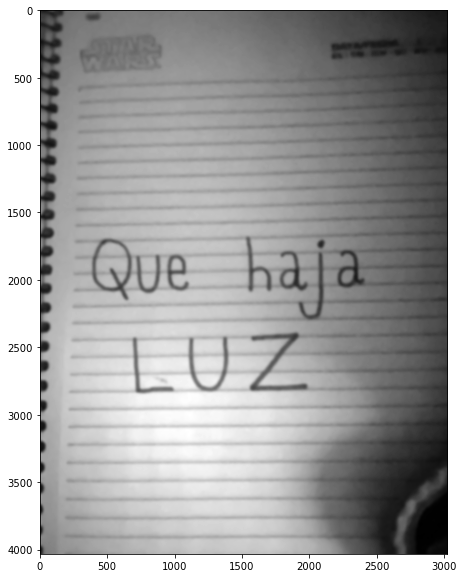

In [4]:
normalized = normalize(raw)
grey = get_greyscale(normalized)
gauss = gaussian(grey, 51, 51)

show(gauss)

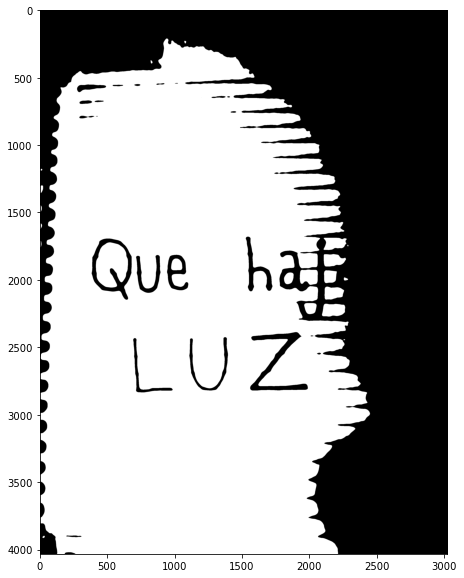

In [5]:
show(thresholding(gauss))

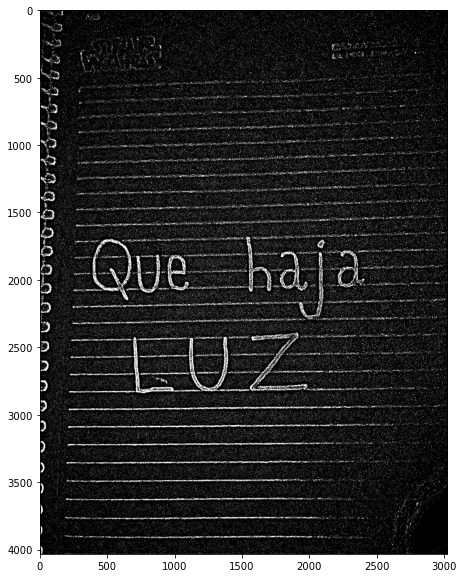

In [6]:
#thres = thresholding(gauss)
thres = gaussian_thresholding(grey)

show(thres)

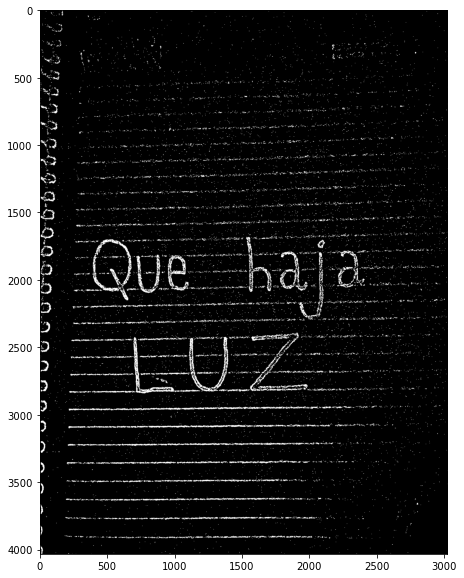

In [17]:
#processed = erode(thres, iterations=2)
processed = thres
#processed = dilate(processed, iterations=1)
processed = erode(processed, iterations=2, window_x=3, window_y=1)
processed = dilate(processed, iterations=2, window_x=2, window_y=2)

show(processed)

## Character Segmentation

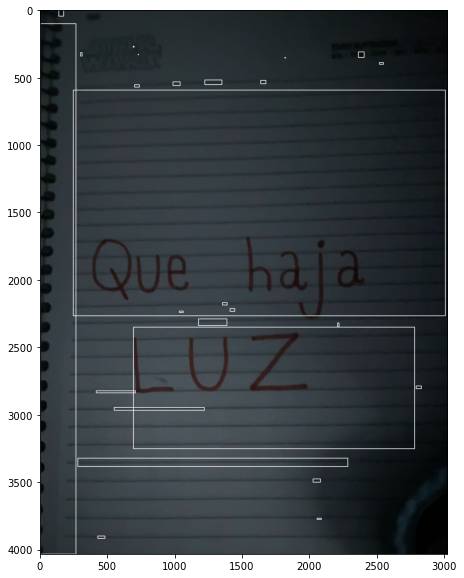

In [18]:
show(get_word_boxes(processed.copy(), (255, 255, 255), raw=raw.copy()))

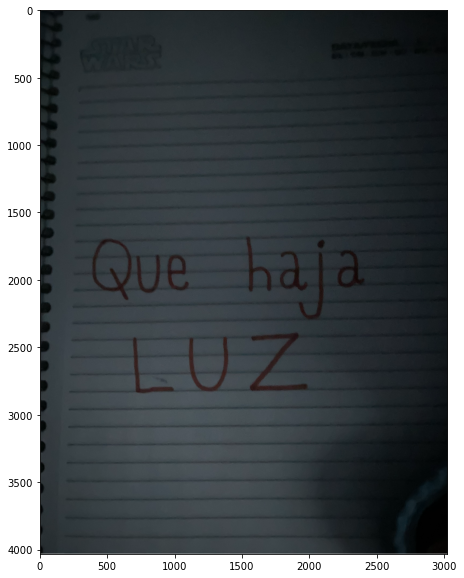

In [19]:
show(get_word_boxes(raw.copy(), (255,255,255)))

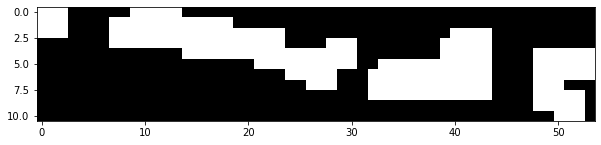

Ce aÃ e



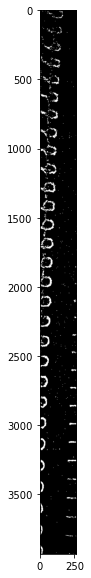

a

na E RC OC O E DS SE E



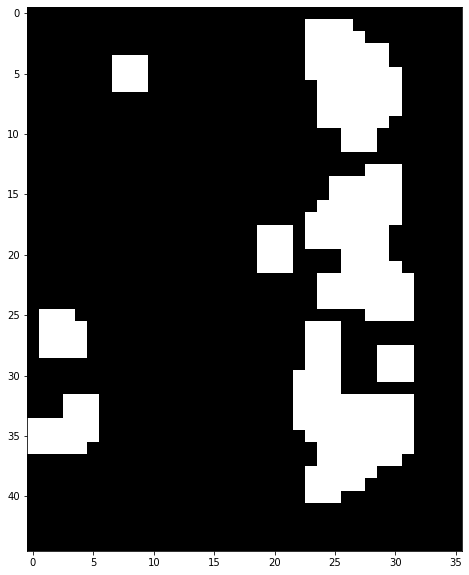

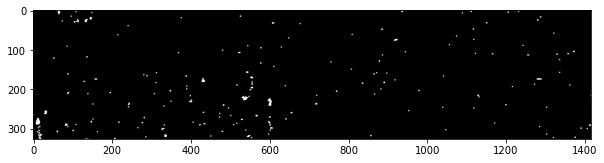

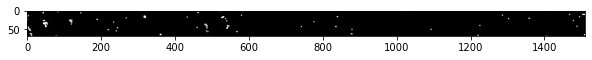

E



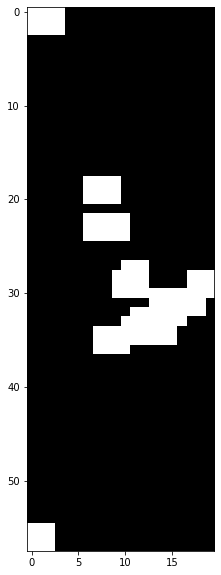

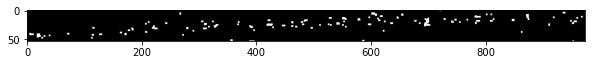

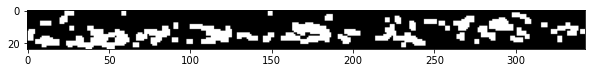

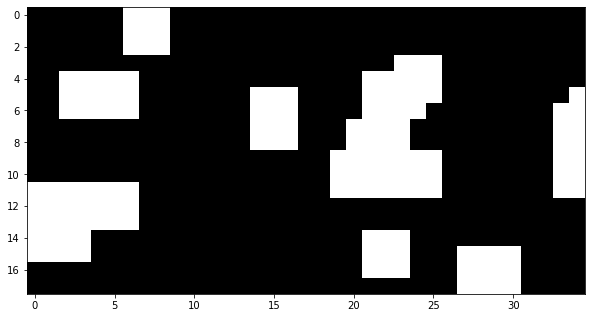

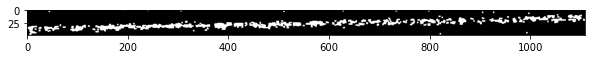

DT De ias sind a do Ra Da nuado e nE da pi A hem hd a



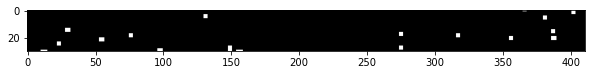

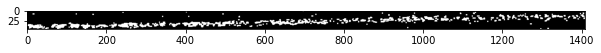

DN QI PUDE E o a

 



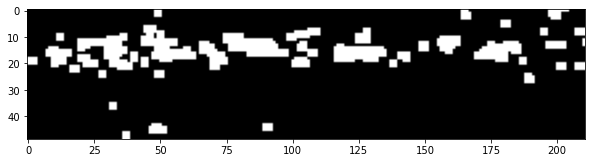

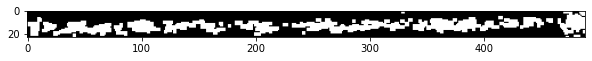

 

ES DER] Mr TS O O O a coli



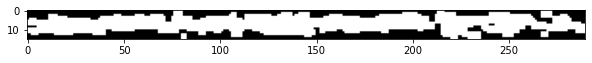

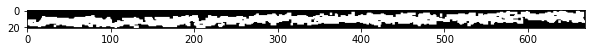

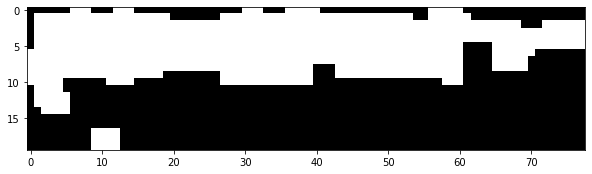

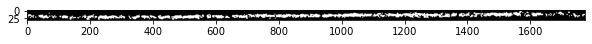

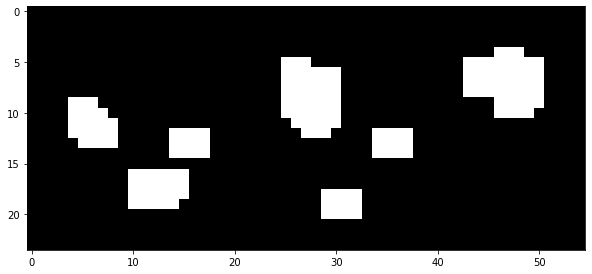

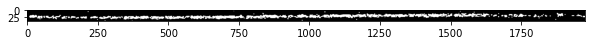

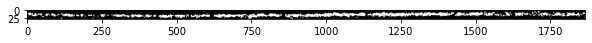

dedos is ea sa Pais nn it asa er ad O si cio Da o idas a Do des Daí scan ideia ei et sete nem ent aula ER A ando Taro is be

 



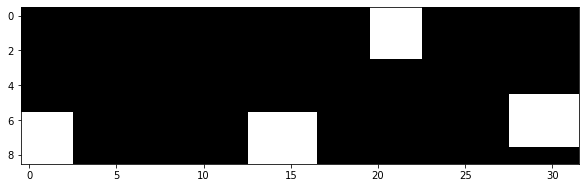

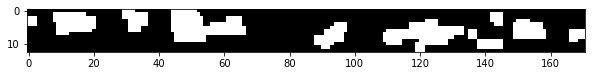

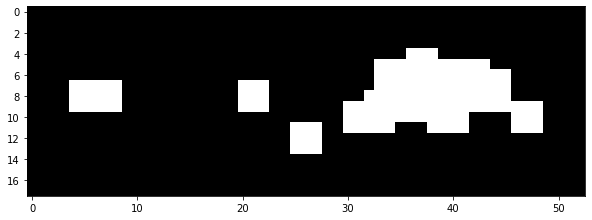

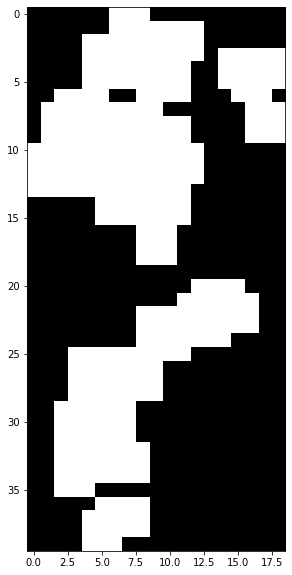

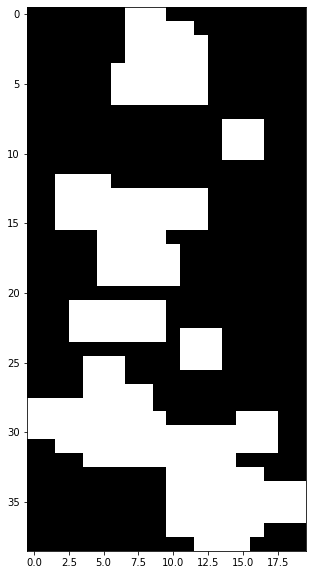

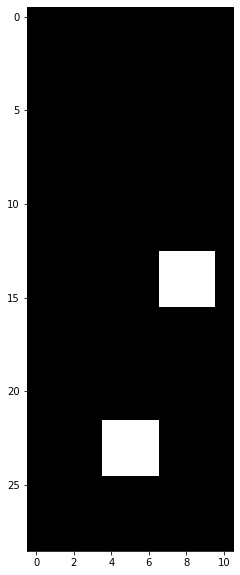

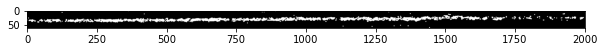

O a raca a ton tennis oba armadas oa pie o ai DO dao ne idea Dt Da PE ma ads ge Ac to ca



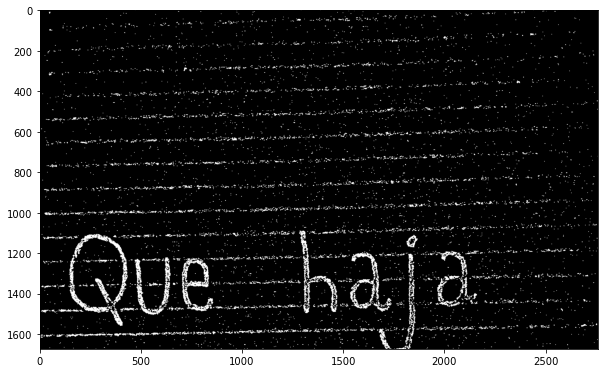

Era DO O a anda Mo bio na O aÃ cd dim To

 

 



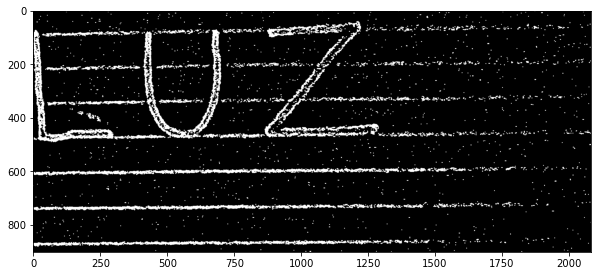

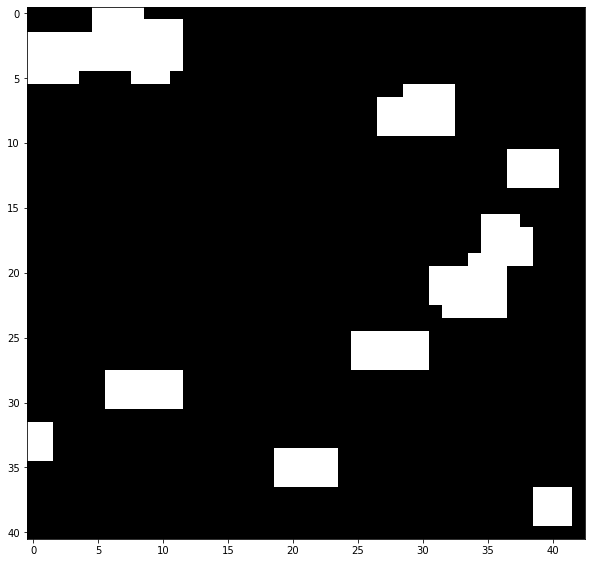

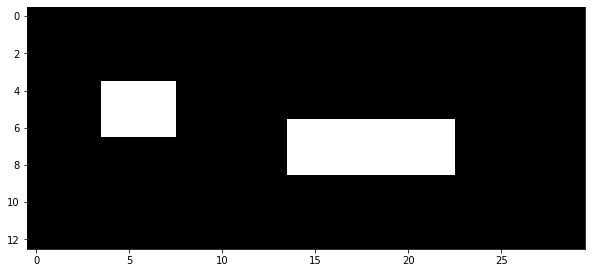

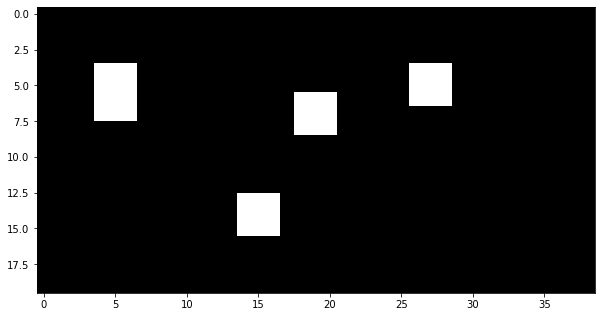

In [20]:
img_dict = get_data(processed)
segments = list()
segments_txt = list()

for i in range(len(img_dict['text'])):
    (x, y, w, h) = (img_dict['left'][i], img_dict['top'][i], img_dict['width'][i], img_dict['height'][i])
    crop_img = processed[y:y+h, x:x+w]
    if img_dict['level'][i] == 3:
        segments.append(crop_img)
        show(crop_img)
        #print(img_dict['text'][i])
        segment_txt = ocr(crop_img)
        segments_txt.append(segment_txt)
        print(segment_txt)


## OCRing

In [21]:
raw_text = ocr(raw)
processed_text = ocr(processed)
segmented_text = ' '.join(segments_txt[0:3:2])

KeyboardInterrupt: 

In [ ]:
print(raw_text)

: 

In [ ]:
print(processed_text)

: 

In [ ]:
print(segmented_text)

: 

## Postprocessing

### Raw image text

In [ ]:
raw_text_pp = remove_double_spaces(' '.join(remove_special(raw_text)))
raw_text_pp = remove_single_letters(raw_text_pp, keep_e=True, keep_a=True)
print(raw_text_pp)

: 

### Processed image text

In [ ]:
processed_text_pp = remove_double_spaces(' '.join(remove_special(processed_text, keep_dot_comma=True)))
processed_text_pp = remove_single_letters(processed_text_pp, keep_e=True, keep_a=True, keep_o=True)
print(processed_text_pp)

: 

### Processed and Segmented image text

In [ ]:
segmented_text = remove_breaks(segmented_text, add_space=True)
segmented_text = remove_double_spaces(segmented_text)
segmented_text = remove_single_letters(segmented_text)
segmented_text = remove_special(segmented_text)
print(segmented_text)

: 